In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('../0_datasets/credit_data.csv')
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [5]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [6]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [51]:
resultados_naive_bayes = []
resultados_naive_bayes_300 = []
resultados_logistica = []
resultados_logistica_300 = []
resultados_forest = []
resultados_forest_300 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_300.append(scores)
    resultados_naive_bayes.append(scores.mean())    
    
    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv=kfold)
    resultados_logistica_300.append(scores)
    resultados_logistica.append(scores.mean())
    
    forest = RandomForestClassifier()
    scores = cross_val_score(forest, X, y, cv=kfold)
    resultados_forest_300.append(scores)
    resultados_forest.append(scores.mean())   

In [52]:
resultados_naive_bayes = np.array(resultados_naive_bayes)
resultados_naive_bayes_300 = np.array(np.asarray(resultados_naive_bayes_300).reshape(-1))
resultados_logistica = np.array(resultados_logistica)
resultados_logistica_300 = np.array(np.asarray(resultados_logistica_300).reshape(-1))
resultados_forest = np.array(resultados_forest)
resultados_forest_300 = np.array(np.asarray(resultados_forest_300).reshape(-1))

### Avaliando os algoritmos

In [53]:
import statistics
from scipy import stats

#### Média

In [54]:
# Média GaussianNB
resultados_naive_bayes.mean()

0.9249170854271358

In [55]:
# Média LogisticRegression
resultados_logistica.mean()

0.9103668341708544

In [56]:
# Média RandomForestClassifier
resultados_forest.mean()

0.9862498324958124

#### Moda

In [57]:
# Moda GaussianNB
stats.mode(resultados_naive_bayes)

ModeResult(mode=array([0.92491709]), count=array([30]))

In [58]:
# Moda LogisticRegression
stats.mode(resultados_logistica)

ModeResult(mode=array([0.91036683]), count=array([30]))

In [59]:
# Moda RandomForestClassifier
stats.mode(resultados_forest)

ModeResult(mode=array([0.98648492]), count=array([4]))

#### Mediana

In [60]:
# Mediana GaussianNB
np.median(resultados_naive_bayes)

0.9249170854271356

In [61]:
# Mediana LogisticRegression
np.median(resultados_logistica)

0.9103668341708543

In [62]:
# Mediana RandomForestClassifier
np.median(resultados_forest)

0.9864798994974875

#### Variância

In [63]:
# Variância GaussianNB
np.var(resultados_naive_bayes)

4.930380657631324e-32

In [64]:
# Variância LogisticRegression
np.var(resultados_logistica)

1.232595164407831e-32

In [65]:
# Variância RandomForestClassifier
np.var(resultados_forest)

5.991875976756644e-07

In [66]:
variancias = []
for v in [np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)]:
       variancias.append(v)
        
np.min(variancias), np.max(variancias)

(1.232595164407831e-32, 5.991875976756644e-07)

#### Desvio Padrão

In [67]:
# Desvio Padrão GaussianNB
np.std(resultados_naive_bayes)

2.220446049250313e-16

In [68]:
# Desvio Padrão LogisticRegression
np.std(resultados_logistica)

1.1102230246251565e-16

In [69]:
# Desvio Padrão RandomForestClassifier
np.std(resultados_forest)

0.0007740720881647035

#### Coeficiente de variação

In [70]:
# Coeficiente de variação GaussianNB
stats.variation(resultados_naive_bayes) * 100

2.4006974076220995e-14

In [71]:
# Coeficiente de variação LogisticRegression
stats.variation(resultados_logistica) * 100

1.2195336901045253e-14

In [72]:
# Coeficiente de variação RandomForestClassifier
stats.variation(resultados_forest) * 100

0.07848641010217765

#### Intervalos de confiança

In [73]:
from scipy.stats import t

In [76]:
# Intervalos de confiança do GaussianNB
n = len(resultados_naive_bayes)
media = np.mean(resultados_naive_bayes)
desvio_padrao = np.std(resultados_naive_bayes)

intervalos = t.interval(0.95, n-1, media, stats.sem(resultados_naive_bayes, ddof=0))
margem_erro = media - intervalos[0]

intervalos, margem_erro

((0.9249170854271357, 0.9249170854271359), 1.1102230246251565e-16)

In [77]:
# Intervalos de confiança do LogisticRegression
n = len(resultados_logistica)
media = np.mean(resultados_logistica)
desvio_padrao = np.std(resultados_logistica)

intervalos = t.interval(0.95, n-1, media, stats.sem(resultados_logistica, ddof=0))
margem_erro = media - intervalos[0]

intervalos, margem_erro

((0.9103668341708544, 0.9103668341708544), 0.0)

In [78]:
# Intervalos de confiança do RandomForestClassifier
n = len(resultados_forest)
media = np.mean(resultados_forest)
desvio_padrao = np.std(resultados_forest)

intervalos = t.interval(0.95, n-1, media, stats.sem(resultados_forest, ddof=0))
margem_erro = media - intervalos[0]

intervalos, margem_erro

((0.9859607892277986, 0.9865388757638263), 0.0002890432680138222)

Temos 98% de confiança de que a média de acertos do Random Forest está no intervalo entre 98,57% e 98.66%

#### Teste de hipótese de Shapiro-Wilk

In [79]:
from scipy.stats import shapiro

In [80]:
shapiro(resultados_naive_bayes), shapiro(resultados_logistica), shapiro(resultados_forest)

c:\users\alisson\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=0.9516385197639465, pvalue=0.18700410425662994))

#### Teste de hipótese de D'Agostinho k^2

In [81]:
from scipy.stats import normaltest
normaltest(resultados_naive_bayes), normaltest(resultados_logistica), normaltest(resultados_forest)

(NormaltestResult(statistic=283.7244653184024, pvalue=2.4547946360146135e-62),
 NormaltestResult(statistic=283.7244653184024, pvalue=2.4547946360146135e-62),
 NormaltestResult(statistic=0.8213188335015257, pvalue=0.6632127723006904))

#### Teste de hipótese de Anderson-Darling

In [82]:
from scipy.stats import anderson
anderson(resultados_naive_bayes).statistic, anderson(resultados_logistica).statistic, anderson(resultados_forest).statistic

(29.79421827104722, 29.79421827104722, 0.570088057698598)

### Testes não parmétricos

#### Teste de Wilcoxon Signed-Rank

In [83]:
alpha = 0.05

In [84]:
from scipy.stats import wilcoxon

In [85]:
_, p = wilcoxon(resultados_naive_bayes, resultados_logistica)
p

4.320463057827488e-08

In [86]:
_, p = wilcoxon(resultados_naive_bayes, resultados_forest)
p

1.7062176754796548e-06

In [87]:
_, p = wilcoxon(resultados_logistica, resultados_forest)
p

1.7062176754796548e-06

#### Teste de Friedman

In [88]:
from scipy.stats import friedmanchisquare

In [89]:
_, p = friedmanchisquare(resultados_naive_bayes, resultados_logistica, resultados_forest)
p

9.357622968840163e-14

#### Testes ANOVA e Tukey

In [91]:
from scipy.stats import f_oneway

In [92]:
_, p = f_oneway(resultados_naive_bayes, resultados_logistica, resultados_forest)
p

3.8829820099191304e-163

In [93]:
alpha = 0.05
if p < alpha:
    print('Hipóteses nula rejeitada. Dados são diferentes.')
else:
    print('Hipóteses alternativa rejeitada.')

Hipóteses nula rejeitada. Dados são diferentes.


In [114]:
resultados_algoritmos = {
    'accuracy': np.concatenate([resultados_naive_bayes, resultados_logistica, resultados_forest]),
    'algoritmo': np.concatenate([np.array(['naive']*30), np.array(['logistic']*30), np.array(['forest']*30)])
}

In [115]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.924917,naive
1,0.924917,naive
2,0.924917,naive
3,0.924917,naive
4,0.924917,naive
...,...,...
85,0.985485,forest
86,0.986985,forest
87,0.986485,forest
88,0.985982,forest


In [90]:
from statsmodels.stats.multicomp import MultiComparison

In [117]:
compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [118]:
teste = compara_grupos.tukeyhsd()
print(teste)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic  -0.0759 0.001 -0.0762 -0.0756   True
  forest    naive  -0.0613 0.001 -0.0616 -0.0611   True
logistic    naive   0.0146 0.001  0.0143  0.0148   True
-------------------------------------------------------


c:\users\alisson\appdata\local\programs\python\python39\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


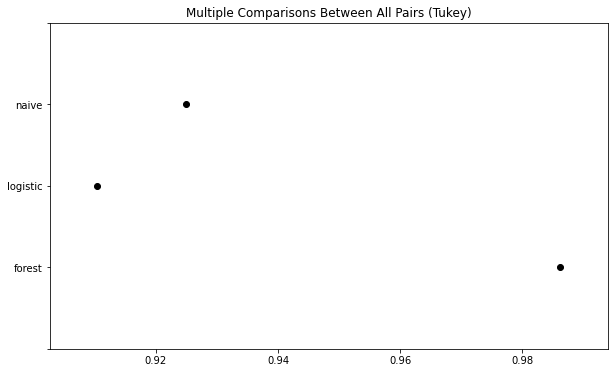

In [120]:
teste.plot_simultaneous();